In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/NEET_Rank_Score_Data.csv")

In [4]:
df.head()

,Year,Candidate_ID,Name,State,Category,Total_Score,Percentile,AIR (All India Rank),State_Rank,Category_Rank,Qualified_Status,Cutoff_Score
0,2019,NEET195010,Candidate_2800,Uttar Pradesh,ST,283,39.31,167419,1909,2725,Yes,112
1,2024,NEET644990,Candidate_3623,Maharashtra,SC,206,28.61,169771,69,2808,Yes,134
2,2019,NEET775386,Candidate_8406,Tamil Nadu,EWS,113,15.69,180415,341,5896,No,141
3,2023,NEET867767,Candidate_3930,Maharashtra,ST,503,69.86,170202,4282,8278,Yes,114
4,2015,NEET839581,Candidate_2298,Tamil Nadu,SC,565,78.47,136689,4548,8517,Yes,132


In [5]:
df.describe()

,Year,Total_Score,Percentile,AIR (All India Rank),State_Rank,Category_Rank,Cutoff_Score
count,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2019.49706,409.02822,56.809475,100035.820620,2498.029240,5031.105920,134.459200
std,2.86181,179.60170,24.944675,57762.351241,1439.951178,2888.851244,14.166716
min,2015.00000,100.00000,13.890000,8.000000,1.000000,1.000000,100.000000
25%,2017.00000,253.00000,35.140000,50112.750000,1254.000000,2557.750000,125.000000
50%,2020.00000,408.00000,56.670000,99982.500000,2494.000000,5034.000000,140.000000
75%,2022.00000,565.00000,78.470000,150066.000000,3740.000000,7542.000000,145.000000
max,2024.00000,720.00000,100.000000,199997.000000,5000.000000,10000.000000,150.000000


In [6]:
df.apply(lambda x: sum(x.isnull()),axis = 0)

,0
Year,0
Candidate_ID,0
Name,0
State,0
Category,0
Total_Score,0
Percentile,0
AIR (All India Rank),0
State_Rank,0
Category_Rank,0


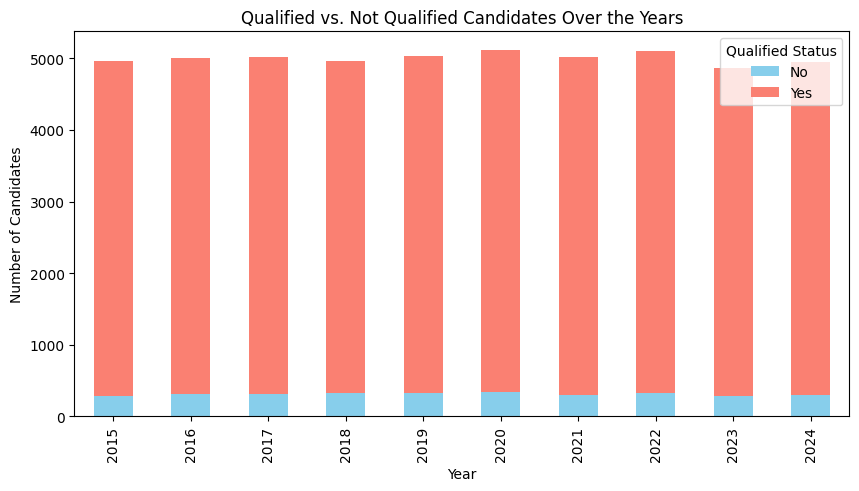

In [7]:
# Count "yes" and "no" for each year
qualified_counts = df.groupby(['Year', 'Qualified_Status']).size().unstack()

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot "yes" and "no" as bars
qualified_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=ax)

# Labels and Title
ax.set_xlabel('Year')
ax.set_ylabel('Number of Candidates')
ax.set_title("Qualified vs. Not Qualified Candidates Over the Years")
ax.legend(title="Qualified Status")

# Show Plot
plt.show()

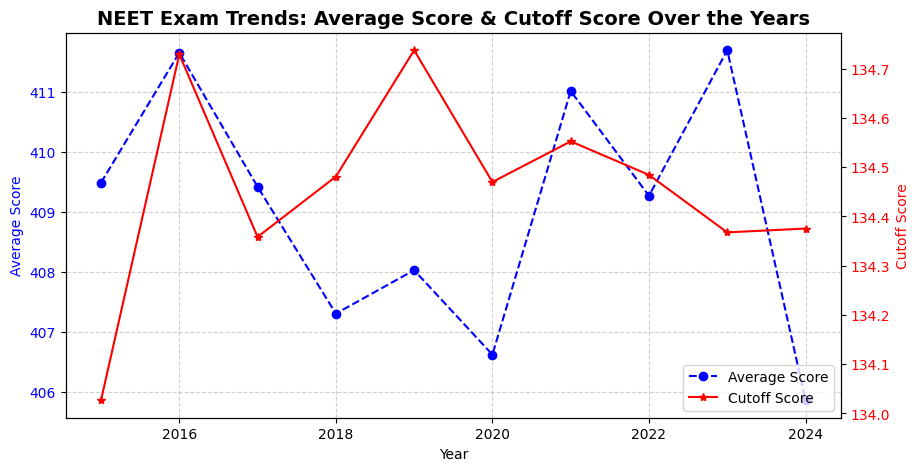

In [8]:
# Sample Data
yearly_avg = df.groupby('Year').agg({'Total_Score': 'mean', 'Cutoff_Score': 'mean'}).reset_index()

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# First y-axis (Total Score)
line1, = ax1.plot(yearly_avg['Year'], yearly_avg['Total_Score'],
                   marker='o', linestyle='--', color='b', label='Average Score')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Score', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Second y-axis (Cutoff Score)
ax2 = ax1.twinx()
line2, = ax2.plot(yearly_avg['Year'], yearly_avg['Cutoff_Score'],
                   marker='*', linestyle='-', color='r', label='Cutoff Score')
ax2.set_ylabel('Cutoff Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legend with both lines
ax1.legend([line1, line2], ['Average Score', 'Cutoff Score'], loc='lower right')

# Title and Grid
plt.title("NEET Exam Trends: Average Score & Cutoff Score Over the Years", fontsize=14, fontweight='bold')
ax1.grid(True, linestyle='--', alpha=0.6)

plt.show()

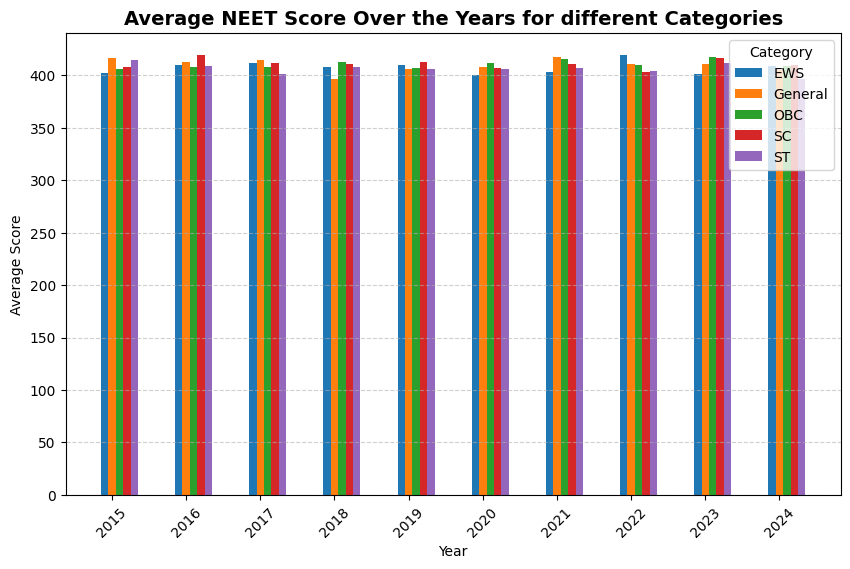

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Compute the average score per category per year
avg_scores = df.groupby(['Year', 'Category'])['Total_Score'].mean().unstack()


# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.1  # Width of bars
x = np.arange(len(avg_scores.index))  # X locations for bars

# Iterate through categories and plot bars
for i, category in enumerate(avg_scores.columns):
    ax.bar(x + i * width, avg_scores[category], width, label=category)

# Labels and Title
ax.set_xlabel("Year")
ax.set_ylabel("Average Score")
ax.set_title("Average NEET Score Over the Years for different Categories", fontsize=14, fontweight='bold')
ax.set_xticks(x + width)
ax.set_xticklabels(avg_scores.index, rotation=45)
ax.legend(title="Category")

# Grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.show()
